<h1><center>Laboratorio 3: Clasificación y Clustering 🔮</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla
- Auxiliar: Ignacio Meza D.
- Ayudante: Diego Irarrázaval

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Joaquín Ortega
- Nombre de alumno 2: María José Zambrano


### **Link de repositorio de GitHub:** https://github.com/mzambrano1/Lab-programacion-cientifica

### Indice 

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

# Temas a tratar

- Manejo de DataFrames con la libreria `pandas`.
- Exploración del dataset y los resultados a través de visualizaciones interactivas usando `plotly`.
- Clasificación en `scikit-learn`
- Uso de pipelines.

## Reglas:

- Fecha de entrega: 4/06/2021
- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar y aprovechar las ventajas que nos ofrece la libreria `pandas`.
- Utilizar `plotly` para obtener información gráfica del dataset.
- Aplicar las ventajas que nos ofrece crear un pipeline.
- Visualizar el funcionamiento de clasificadores.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

#Importamos librerias utiles 😸

In [1]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split 
from sklearn.cluster import KMeans

# Pre-procesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

# Metricas de evaluación
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

#Libreria para plotear
!pip install --upgrade plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
# Proyecciones en baja dimensionalidad: UMAP
!pip install umap-learn

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (4.14.3)


# 1. Predicciones futboleras.

<p align="center">
  <img src="https://thumbs.gfycat.com/ThornyFrankFoxhound-size_restricted.gif" width="500">
</p>

Para este laboratorio se deberá trabajar con los csv ```FullData.csv```, donde deberán aplicar algoritmos de Clustering y clasificación información relevante de jugadores de futbol.

Para comenzar cargue el dataset señalado y visualice a traves de un head los atributos que posee el dataset.

In [2]:
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = '//content//drive//My Drive//CuerpoDocente//Laboratorios//Lab3'
except Exception as e:
    import os
    path = os.getcwd()


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:



In [3]:
df_players = pd.read_csv( path + '/20210528142421E83200FFF63A69__stats_players_(1).csv')
df_players.head()

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185 cm,80 kg,Right,32,High / Low,4,5,93,92,22,23,31,63,96,29,85,86,84,83,77,91,92,92,80,63,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170 cm,72 kg,Left,29,Medium / Medium,4,4,95,97,13,26,28,48,95,22,90,94,77,88,87,92,87,74,59,95,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174 cm,68 kg,Right,25,High / Medium,5,5,95,96,21,33,24,56,88,36,80,80,75,81,75,93,90,79,49,82,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182 cm,85 kg,Right,30,High / Medium,4,4,91,86,30,38,45,78,93,41,84,83,77,83,64,88,77,89,76,60,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193 cm,92 kg,Right,31,Medium / Medium,4,1,48,30,10,11,10,29,85,30,70,70,15,55,59,58,61,44,83,35,52,78,25,25,13,16,14,11,47,11


De la tabla se reconoce:

1. `Name`: Nombre del jugador
2. `Nationality`: Nacionalidad del jugador
3. `National_Position`: Posición en la selección, este valor solo existe cuando el jugador es seleccionado nacional.
4. `Club_Position`: Posición del jugador. Este parámetro tiene valor en gran parte de los jugadores, existen casos como `Res` o `Sub` que no los deberá considerar en la respectiva sección.
5. `Height`: Altura del jugador en centímetros. Si nota esta variable tiene un string, transforme a int.
6. `Weight`: Peso del jugador en kilogramos. Si nota esta variable tiene un string, transforme a int.
7. `Preffered_Foot`: Pie con que prefiere patear.
8. `Age`: Edad
9. `Work_Rate`: Frecuencia con que trabaja.

Mientras que el resto de las características representan estadísticas personales (de acuerdo a la habilidad) para cada uno de los jugadores.


## 1.1 Predicción de seleccionados nacionales. (2 puntos)

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


### 1.1.1 Generación de Labels para la Clasificación

Tras el trágico despido de la mítica mascota de la población de Maipú, *Renacín*, decide adentrarse en la predicción futbolera. Para esto, utilizando los datos cargados en las celdas anteriores, le consulta si es posible predecir **si un jugador de football será seleccionado nacional en base a sus estadísticas**

En este primer experimento de clasificación comience generando las labels para la clasificación. Para esto, trabaje sobre el atributo ```National_Position``` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. Hecho esto, ¿Como se distribuyen los datos para cada clase?, comente lo que observa.


In [4]:
df_players['National_Position'] = df_players['National_Position'].fillna(0)
df_players['National_Position'] = df_players['National_Position'].where(df_players['National_Position'] == 0,1)

In [5]:
print(f"Cantidad de datos etiquetados como seleccionados (1): {(df_players.National_Position == 1).sum()}")
print(f"Cantidad de datos etiquetados como no-seleccionados (0): {(df_players.National_Position == 0).sum()}")

Cantidad de datos etiquetados como seleccionados (1): 1075
Cantidad de datos etiquetados como no-seleccionados (0): 16513


### 1.1.2 Camino a la Clasificación

<p align="center">
  <img src="http://vignette3.wikia.nocookie.net/inciclopedia/images/c/cd/Patada_Medel_Messi.gif/revision/latest?cb=20150705215005" width="300">
</p>



Si bien los atributos de interés se encuentran en su mayoría limpios, existen valores mal ingresados al `DataFrame`. Para esto: 

1. Transforme a enteros todos los valores numéricos de la tabla que considere pertinentes. Por ejemplo: El peso aparece como strings y además estos continene la unidad. En este caso, debería transformar estos valores a enteros. Puede usar directamente funciones sobre el DataFrame (como `apply`) o el submódulo de las Series `str`.
2. Luego, aplique un ```ColumnTransformer``` para pre-procesar los datos del DataFrame de la siguiente forma:

Aplicar ```OneHotEncoder()``` sobre los atributos:

```python
['Preffered_Foot', 'Work_Rate']
```

Aplicar ```MinMaxScaler()``` sobre los atributos:

```python
['Age']
```

Aplicar ```StandardScaler()``` sobre los atributos:

```python
['Height', 'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 'Reactions','Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys']
```

**Nota 2**: Puede copiar/pegar directamente las columnas en el `ColumnTransformer`.


Hecho lo anterior, defina al menos 3 pipelines para la clasificación donde anexe las transformaciones señaladas variando entre cada pipeline solo los clasificadores (puede escoger cualquiera de los clasificadores vistos en clases).

**To-Do:**

- [ ] Modificar valores mal ingresados.
- [ ] Aplicar ```ColumnTransformer``` sobre los datos a través de un pipeline.
- [ ] Justificar porque se utilizan estos pre-procesamientos.
- [ ] Crear 3 pipelines con diferentes clasificadores.
- [ ] No entrenar los datos aún.

**Nota:** No es necesario entrenar los clasificadores aún.

In [6]:
df_players['Height'] = df_players['Height'].str.extract('(\d+)').astype(int)
df_players['Weight'] = df_players['Weight'].str.extract('(\d+)').astype(int)

In [7]:
preprocessing_transformer = ColumnTransformer(
    transformers=[
        ('OneHotEncoder', OneHotEncoder(),  ['Preffered_Foot', 'Work_Rate']),
        ('StandardScaler', StandardScaler(),['Height', 'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Dribbling', 
                                             'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 'Reactions',
                                             'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 
                                             'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping', 
                                             'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve', 'Freekick_Accuracy', 
                                             'Penalties', 'Volleys']), 
        ('scaler',MinMaxScaler(), ['Age'])])

np.random.seed(1)
pipeline_svm = Pipeline([('Preprocessing', preprocessing_transformer),('svm', SVC(gamma = 'auto'))])

np.random.seed(1)
pipeline_logistic = Pipeline([('Preprocessing', preprocessing_transformer),('logistic',LogisticRegression())]) 

np.random.seed(1)
pipeline_forest = Pipeline([('Preprocessing', preprocessing_transformer),('random_forest', RandomForestClassifier())]) 



### 1.1.3 Métricas de evaluación + Opcional

<p align="center">
  <img src="https://media4.giphy.com/media/3orif8r5vpbAdQU3iU/200w.gif?cid=82a1493btc1h43n1h4c59p13kjv6adugso4lo4292zbgt66b&rid=200w.gif&ct=g" width="300">
</p>

Interesado por saber que tan bien funciona su clasificador, Renacin le solicita que construya **a mano** las siguientes métricas de evaluación para el caso de **clasificación binaria**:

- Accuracy (Exactitud):

$$Accuracy = \dfrac{número \, de \, predicciones \, correctas}{número \, de \,predicciones \, totales}$$


- Precision: 

$$Precision = \dfrac{Verdaderos \, positivos}{Verdaderos \, positivos + Falsos \, positivos}$$

- Recall:

$$Recall = \dfrac{Verdaderos \, positivos}{Verdaderos \, positivos + Falsos \,negativos}$$

<p align="center">
  <img src="https://www.researchgate.net/publication/336402347/figure/fig3/AS:812472659349505@1570719985505/Calculation-of-Precision-Recall-and-Accuracy-in-the-confusion-matrix.ppm" width="350">
</p>

**To-Do:**

- [ ] Crear funciones para las métricas para clasificación binaria: Accuracy, Precision y Recall. 
- [ ] Compruebe el correcto funcionamiento de sus métricas a través de los test.

**Hint:** Utilice confusion_matrix para obtener TP, FP, FN y TN.



In [8]:
def accuracy(y_true, y_pred):
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  return (tp + tn)/(tp + fn + fp + tn) 

def presicion(y_true, y_pred):
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  if tp + fp == 0:
    return 0.0
  return tp/(tp + fp)

def recall(y_true, y_pred):
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  return tp/(tp + fn)

In [9]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

y_true = [0, 1, 0, 0, 1, 0]
y_pred = [0, 0, 1, 0, 0, 1]

# Tests de metricas
assert accuracy_score(y_true, y_pred) == accuracy(y_true, y_pred)
assert recall_score(y_true, y_pred) == recall(y_true, y_pred)
assert precision_score(y_true, y_pred) == presicion(y_true, y_pred)

### 1.1.4 Entrenemos los pipelines

<p align="center">
  <img src="https://i.gifer.com/7Cc8.gif" width="300">
</p>


Entrene en base al pipeline generado en los pasos anteriores, procure separar los datos de entrenamiento en un conjunto de entrenamiento y de prueba (la proporción queda a su juicio). Una vez entrenado, muestre los resultados para cada uno de los clasificadores y comente lo que observa de los resultados obtenidos usando las métricas creadas anteriormente, ¿podrían mejorarse los resultados?

**To-Do**:

- [ ] Separar el conjunto de datos en entrenamiento y de prueba.
- [ ] Entrenar el pipeline.
- [ ] Utilizar las métricas codificadas anteriormente y analizar los resultados.


In [10]:
df_players['National_Position'] = df_players['National_Position'].astype(int)

X, y = df_players ,df_players['National_Position']

X_train, X_test, y_train, y_test = train_test_split(X, y) # default values set 0.25 as test size


In [11]:
## Entrenamos

### SVM
pipeline_svm.fit(X_train, y_train)
y_pred_svm = pipeline_svm.predict(X_test)

### Logistic

pipeline_logistic.fit(X_train, y_train)
y_pred_logistic = pipeline_logistic.predict(X_test)

### Random Forest

pipeline_forest.fit(X_train, y_train)
y_pred_forest = pipeline_forest.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [12]:
# Metricas de evaluacion

## SVM

print('SVM:\n',
f'Accuracy: {accuracy(y_test, y_pred_svm)}\n',
f'Presicion: {presicion(y_test, y_pred_svm)}\n',
f'Recall: {recall(y_test, y_pred_svm)}\n'
)

print('LOGISTIC:\n',
f'Accuracy: {accuracy(y_test, y_pred_logistic)}\n',
f'Presicion: {presicion(y_test, y_pred_logistic)}\n',
f'Recall: {recall(y_test, y_pred_logistic)}\n'
)


print('RANDOM FOREST:\n',
f'Accuracy: {accuracy(y_test, y_pred_forest)}\n',
f'Presicion: {presicion(y_test, y_pred_forest)}\n',
f'Recall: {recall(y_test, y_pred_forest)}\n'
)


SVM:
 Accuracy: 0.9358653627473277
 Presicion: 0.0
 Recall: 0.0

LOGISTIC:
 Accuracy: 0.9365476461223562
 Presicion: 0.5882352941176471
 Recall: 0.03546099290780142

RANDOM FOREST:
 Accuracy: 0.9356379349556516
 Presicion: 0.4878048780487805
 Recall: 0.07092198581560284



**Respuesta**:

```
Comente de resultados observados y si es posible mejorar los resultados.
```

Es posible observar grandes diferencias entre modelos (sobre todo c/r al que utiliza SVM). El mejor modelo según las métricas anteriores es el que utiliza regresión logistica como clasificador, pues a pesar que tiene un peor desempeño en recall con respecto al modelo que utiliza random forest, es más superior a este en cuanto a precision. El caso del modelo con SVM, es posible ver un pésimo desempeño en las métricas de recall y precision, esto debido a que clasifica todo en la clase 0.

A nivel general, el desempeño en recall es bastante malo debido a que los modelos entrenados tienen un alto número de falsos negativos. Lo anterior podría mejorarse balanceando el dataset, dado que hay muchos de la clase 0, lo cual es lógico considerando que gran parte de los jugadores de futbol no son seleccionados.


## 1.2 Predicción de posiciones de jugadores. (2 puntos)

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

### 1.2.1 Creación de nuevas labels.



No conforme con el trabajo de la sección 1.1, Renacin les *ordena* que construyan un clasificador nuevo, pero para predecir la posición de los jugadores del dataset. Para lograr esto, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo ```Club_Position```, con esto les recalca que no deben utilizar los valores ```Sub``` y ```Res``` de este atributo, pidiendo que agrupen los valores en los siguientes grupos:

```python
Ataque=['ST', 'CAM','RS','LF','LAM','LS','RF','RAM','CF']
MedioCampistas=['RCM','LW', 'RW', 'LCM','LM', 'RM', 'CM']
Defensas=['LCB','RB','RCB', 'LDM','LB','CDM','RDM','CB','RWB','LWB']
Arquero =['GK']
```

Con lo señalado, Renacin les señala que no deberian utilizar el label utilizado en la sección 1.1, ya que el problema de clasificación ahora es de posiciones.

**To-Do**:

- [ ] Aplique las etiquetas de ```Ataque```, ```MedioCampista```, ```Defensa``` y ```Arquero``` en los valores señalados en esta sección.
- [ ] Muestre como se distribuyen los datos etiquetados.

In [13]:
df_players = df_players[(df_players['Club_Position'] != 'Res') & (df_players['Club_Position'] != 'Sub')]

In [14]:
df_players = df_players[(df_players['Club_Position'].notna())]

In [15]:
posiciones = {}

posiciones.update(dict.fromkeys(['ST', 'CAM','RS','LF','LAM','LS','RF','RAM','CF'], 'Ataque'))
posiciones.update(dict.fromkeys(['RCM','LW', 'RW', 'LCM','LM', 'RM', 'CM'], 'MedioCampistas'))
posiciones.update(dict.fromkeys(['LCB','RB','RCB', 'LDM','LB','CDM','RDM','CB','RWB','LWB'], 'Defensas'))
posiciones.update(dict.fromkeys(['GK'], 'Arquero'))


In [16]:
df_players['Club_Position'] = df_players['Club_Position'].apply(lambda x: posiciones[x])



In [17]:
print(f"Cantidad de datos etiquetados como delantero: {(df_players.Club_Position == 'Ataque').sum()}")
print(f"Cantidad de datos etiquetados como defensa: {(df_players.Club_Position == 'Defensas').sum()}")
print(f"Cantidad de datos etiquetados como medio campistas: {(df_players.Club_Position == 'MedioCampistas').sum()}")
print(f"Cantidad de datos etiquetados como arqueros: {(df_players.Club_Position == 'Arquero').sum()}")

Cantidad de datos etiquetados como delantero: 1252
Cantidad de datos etiquetados como defensa: 3185
Cantidad de datos etiquetados como medio campistas: 1880
Cantidad de datos etiquetados como arqueros: 632


### 1.2.2 Entrenar un pipeline

Aplicando el mismo preprocesamiento solicitado en 1.1.2, genere un pipeline con un clasificador a gusto y evalúe al modelo de clasificación utilizando la **librería `scikit-learn`** (esto debido a que este es un problema multi clase y las funciones solicitadas anteriormente era para una clasificación binaria).

De los resultados obtenidos, ¿El modelo pudo clasificar mejor este problema o el de la sección 1.1?, Comente sus resultados.

**To-Do**:

- [ ] Genere un pipeline similar al visto en la sección 1.1.2.
- [ ] Aplique las métricas ofrecidas por la librería scikit-learn.
- [ ] Responda la pregunta del enunciado.

In [18]:
np.random.seed(100)
pipeline_posiciones = Pipeline([('Preprocessing', preprocessing_transformer),('logistic',LogisticRegression(max_iter=1000))]) 

# Split
df_players['Club_Position'] = df_players['Club_Position'].astype(str)
X, y = df_players ,df_players['Club_Position']
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Entrenar
pipeline_posiciones.fit(X_train, y_train)
y_pred_posiciones = pipeline_posiciones.predict(X_test)


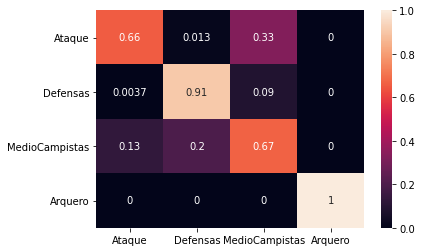

In [19]:
import seaborn as sns
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred_posiciones, labels=['Ataque','Defensas','MedioCampistas','Arquero'] , normalize= 'true' ),['Ataque','Defensas','MedioCampistas','Arquero'], ['Ataque','Defensas','MedioCampistas','Arquero'] ), annot = True);

In [20]:
a = accuracy_score(y_test, y_pred_posiciones)
p = precision_score(y_test, y_pred_posiciones, average='macro')
r = recall_score(y_test, y_pred_posiciones, average='macro')

print(f'Accuracy: {a}\nPrecision: {p} \nRecall: {r}')

Accuracy: 0.8072497123130035
Precision: 0.8210057208133785 
Recall: 0.8080956454529764


**Respuesta**:

```
Comente de resultados observados.
```
Si bien las clasificaciones solicitadas para la sección 1.1 no son comparables con las de esta sección (debido a que en la sección anterior se trata de una clasificación binaria y de un parámetro totalmente distinto), se logran métricas con menor variación entre ellas, e igualmente con un desempeño relativamente alto.

De los resultados obtenidos en esta sección, se puede ver una muy buena clasificación para los defensas y una excelente clasificación para los arqueros. La mayor confusión que tuvo el modelo fue entre los mediocampistas y delanteros.

La predicción de la posición podría ser viable con este modelo, hace falta un set de testeo diferente para validar aún más el modelo.





## 1.3 Clustering Sobre el Dataset (2 puntos)

<p align="center">
  <img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F1832816%2F349289c622faaff3afc517a46fcf4c71%2Fk-means.jpg?generation=1577258176400530&alt=media" width="200">
</p>

### 1.3.1 Elección de numero de clusters

<p align="center">
  <img src="https://media1.tenor.com/images/a85e9df2f5784d6513dce853ba9d5755/tenor.gif?itemid=18229271" width="200">
</p>





Entrene un k-means con 3, 4 y 5 clusters. ¿Las agrupaciones son lógicas usando un análisis visual?, Grafique los clusters con el código dispuesto más abajo y comente cual de las opciones presenta una mejor agrupación.

En base al análisis realizado, ubique la posición de los cluster en la cancha. Solo señale a que posición equivaldría tomando de referencia:

- Ataque
- Medio campistas
- Defensas
- Arquero 

**To-Do**:

- [ ] Escoger un numero de cluster y justificar elección.
- [ ] Comentar si las agrupaciones son lógicas a través de un análisis visual.
- [ ] Graficar los resultados obtenidos y visualizar las agrupaciones obtenidas.


In [21]:
preprocessed_data = preprocessing_transformer.fit_transform(df_players)

In [22]:
from umap import UMAP

def graficar_clusters(clusters, preprocessed_data = preprocessed_data,posicion = df_players.Club_Position.values):
  # Entreguele a esta función solo los clusters, el resto de parametros debería funcionar por default.
  umap = UMAP()
  projections = umap.fit_transform(preprocessed_data)
  fig = px.scatter(x=projections[:,0], y=projections[:,1], color=clusters, hover_data={'posicion': posicion}) 
  fig.show()

In [23]:
kmeans_3 = KMeans(n_clusters=3)
kmeans_4 = KMeans(n_clusters=4)
kmeans_5 = KMeans(n_clusters=5)

kmeans_3.fit(preprocessed_data)
kmeans_4.fit(preprocessed_data)
kmeans_5.fit(preprocessed_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
graficar_clusters(kmeans_3.labels_)

In [25]:
graficar_clusters(kmeans_4.labels_)

In [26]:
graficar_clusters(kmeans_5.labels_)

**Respuesta**:

```
Comente de resultados observados.
```

La visualización es consistente con los resultados del clasificador de regresión logística de la sección anterior, los arqueros son casi perfectamente segmentados del resto de los jugadores, los defensas igualmente son bien segmentados pero también hay un grupo que se tiende a mezclar con mediocampistas. Los mediocampistas y delanteros son peor clasificados, pues se mezclan en sus clusters. Con respecto a lo anterior, el número de clusters que tiene mejor segmentación es el de 4 clusters, pues separa dos clusters casi puramente de arqueros y defensas; y otros dos clusters que juntan mediocampistas con defensas y mediocampistas con atacantes.


### 1.3.2 Búsqueda Número Óptimo de Clusters: Método del Codo **(Opcional 0.5 puntos)**

<p align="center">
  <img src="https://c.tenor.com/fk4p5HzTi5gAAAAC/elbow-high-five.gif" width="300">
</p>





Renancin muy indeciso de sus resultados le comenta que desea realizar un último trabajo. En esta última tarea le solicita la agrupación de los datos obtenidos en la sección 1.2 utilizando K-means. Para esto usted deberá visualizar a través del método del codo el número óptimo de agrupaciones para los datos. 

**Hint:** Revisar las clases y encontrar el código.

**To-Do**:

- [ ] Pre-procesar los datos con el mismo preprocesamiento aplicado en 1.2
- [ ] Utilizar el método del codo para obtener el número de clusters.

In [27]:
elbow = pd.DataFrame(columns=['SSE','k'])
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(preprocessed_data)
    elbow = elbow.append({'SSE': kmeans.inertia_, 'k': k}, ignore_index=True)

# Son ploteados los Resultados
fig = go.Figure(data=[
    go.Scatter(x = elbow.k, y=elbow.SSE, mode='lines'),
    go.Scatter(x = elbow.k, y=elbow.SSE, mode='markers')
])

fig.update_layout(title="Evaluación de los Clusters (Metodo del Codo):",
                 xaxis_title = "Numero de Clusters:",
                 yaxis_title = "SSE",
                 showlegend=False)
fig.show()


**Respuesta**:

```
Comente de resultados observados y si es posible mejorar los resultados.
```
Al ver el gráfico se puede ver que el 'codo' se encuentra en los 4 clusters, consistente al número de clusters elegido como optimo en la sección anterior.


# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana y que **los días de atraso no se pueden utilizar para entregas de lab, solo para tareas**. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media2.giphy.com/media/l1J3CbFgn5o7DGRuE/giphy.gif">
</p>